In [ ]:
#memory that we can use
!free -h --si | awk  '/Mem:/{print $2}'
#GPU count and name
!nvidia-smi

13G
Thu Jan 14 06:20:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8     8W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+---

In [ ]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [ ]:
import torch
from modules import IGR, Visualization, Operation, Network

In [ ]:
# GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Define data set name and constraint type
dataset_name = 'stanford-bunny'
distribution_name = 'uniform_gaussian'
p = 2
constraint_name = str(p) + 'laplacian'
prev_iteration = 20000
iteration = 5000
# loss_type = 'IGR'
network_ver = 'v0_7'
batch_size = 4096

In [ ]:
# Load points from file
filename = mp + '/dataset/3d/' + dataset_name + '.xyz'
dataset, normal_vectors = Operation.read_txt3(filename, device=device)

In [ ]:
traineddata_path = mp + '/models/' + dataset_name + '_' + distribution_name + '_' + constraint_name + '_' + str(prev_iteration) + '_' + network_ver + '.traineddata'
model, optimizer, scheduler = Network.load_model(traineddata_path, dimension=3, device=device)

Model loaded


Setting up
Loss values loaded
Getting distance to 50th closest neighbor
Getting sampling range

Training
Iteration: 20100   Loss: 0.023807233199477196   Learning rate: 1.953125e-06
Surface loss: 0.0001026212121360004   Normal loss: 0.023134704679250717   Constraint: 0.0011398174101486802

Iteration: 20200   Loss: 0.023933565244078636   Learning rate: 1.953125e-06
Surface loss: 0.0001065076794475317   Normal loss: 0.023238837718963623   Constraint: 0.0011764407390728593

Iteration: 20300   Loss: 0.023797236382961273   Learning rate: 1.953125e-06
Surface loss: 0.00011505115253385156   Normal loss: 0.023093026131391525   Constraint: 0.001178318401798606

Iteration: 20400   Loss: 0.02396668680012226   Learning rate: 1.953125e-06
Surface loss: 0.00010657100938260555   Normal loss: 0.02325371466577053   Constraint: 0.0012128009693697095

Iteration: 20500   Loss: 0.023829393088817596   Learning rate: 1.953125e-06
Surface loss: 0.00010352702520322055   Normal loss: 0.02318531647324562   Constr

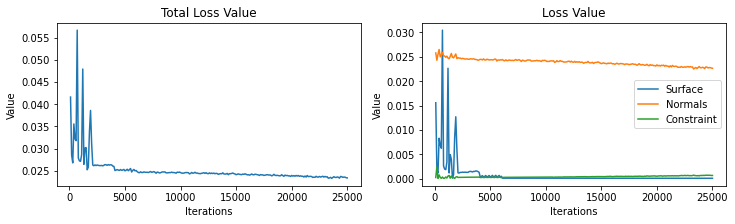

In [ ]:
outfile = mp + '/figures/loss_value/' + dataset_name + '_' +  distribution_name + '_' + constraint_name + '_' + network_ver + '.npy'
model, optimizer, scheduler = IGR.train_data(iteration,
                             model,
                             optimizer,
                             scheduler,
                             p=p,
                             batch_size=batch_size,
                             points=dataset,
                             normal_vectors=normal_vectors,
                             loss_output_path=outfile,
                             device=device)

In [ ]:
save_path = mp + '/models/' + dataset_name + '_' + distribution_name + '_' + constraint_name + '_' + str(prev_iteration + iteration) + '_' + network_ver + '.traineddata'
Network.save_model(save_path, model, optimizer, scheduler)

All shells below are commented out to save data usage

In [ ]:
# xx, yy, zz = Visualization.grid_from_torch(dataset, resx=16, resy=16, resz=16, device=device)

In [ ]:
# constraint_output = None
# vtk_output_path = dataset_name + '_' + distribution_name + '_' + constraint_name + '_' + str(prev_iteration + iteration) + '_' + network_ver + '.vtk'
# z = Visualization.nn_sampling(model, xx, yy, zz, 
#                               constraint_output=constraint_output,
#                               vtk_output_path = vtk_output_path,
#                               device=device)

In [ ]:
# Visualization.visualize3(dataset.detach().cpu().numpy(), normal_vectors.detach().cpu().numpy(), z.detach().cpu().numpy(), scatter=False, vecfield=False)